<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/DetSirUK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
path ="/content/drive/MyDrive/PhD Research Project/beta_1.56756_gamma_0.36508.csv"
all_data=pd.read_csv(path)
all_data.head(4)

,time,S,I,R
0,0.00,0.999999,0.000001,0.000000e+00
1,0.05,0.999999,0.000001,1.881974e-08
2,0.10,0.999999,0.000001,3.880604e-08
3,0.15,0.999999,0.000001,6.003122e-08


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

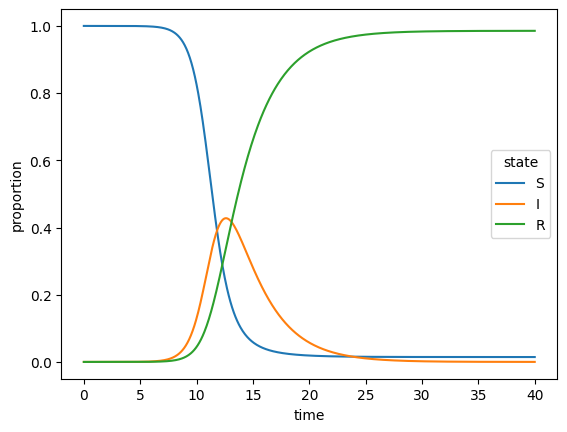

In [ ]:
# Reshape the data
all_data_long = all_data.melt(id_vars=['time'], var_name='state', value_name='proportion')

# Plotting the data
# a) Line plot with different colors for each state
sns.lineplot(data=all_data_long, x='time', y='proportion', hue='state')
plt.show()


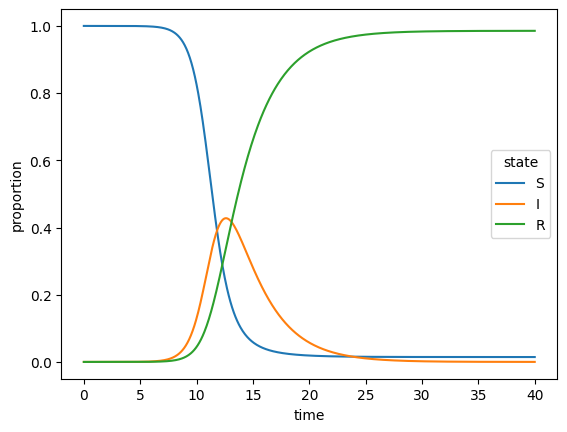

In [ ]:
# c) Modify the levels of the state variable to be in S,I,R order
all_data_long['state'] = pd.Categorical(all_data_long['state'], categories=["S", "I", "R"])

# Plotting the reordered data
sns.lineplot(data=all_data_long, x='time', y='proportion', hue='state')
plt.show()

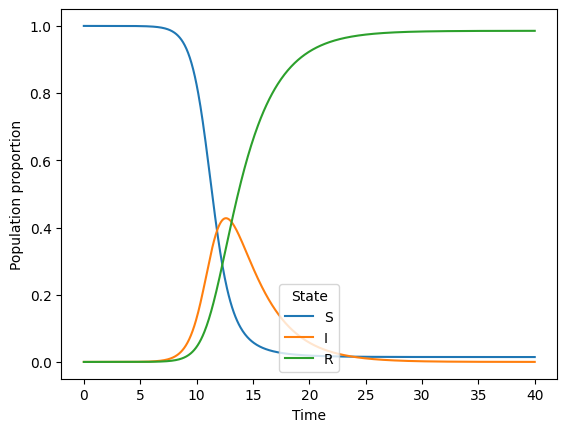

In [ ]:
# d) Add labels to the x and y axes, change to theme_bw(), and set the legend position
sns.lineplot(data=all_data_long, x='time', y='proportion', hue='state')
plt.xlabel("Time")
plt.ylabel("Population proportion")
plt.legend(title='State', loc='lower center')
sns.set_theme(style="white")
plt.show()

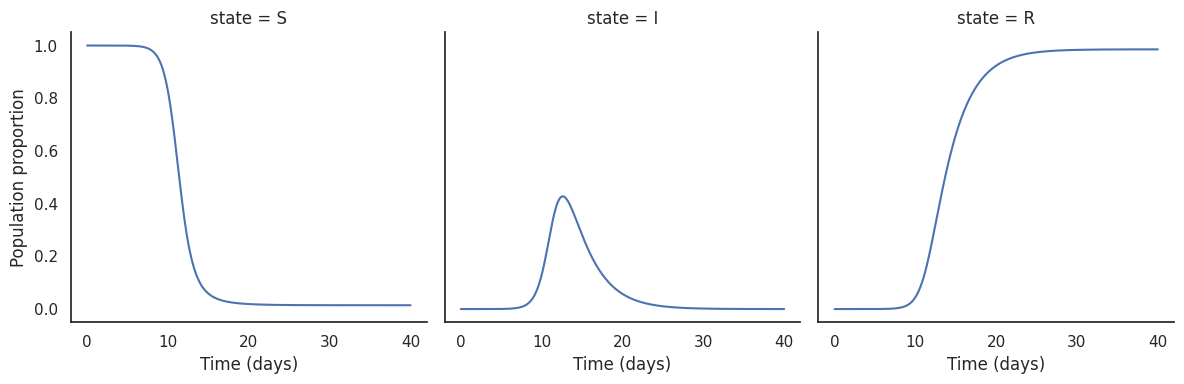

In [ ]:
g = sns.FacetGrid(all_data_long, col='state', col_wrap=3, height=4)
g.map(sns.lineplot, 'time', 'proportion')
g.set_axis_labels("Time (days)", "Population proportion")
plt.show()

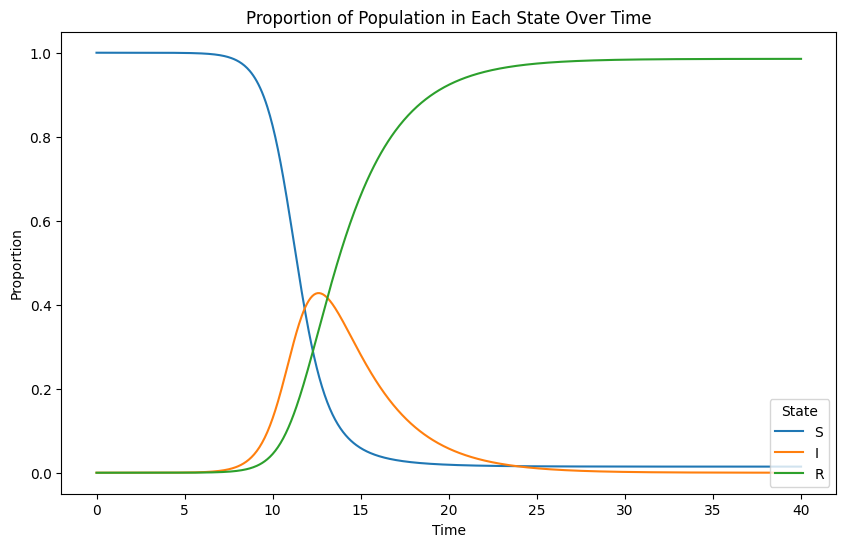

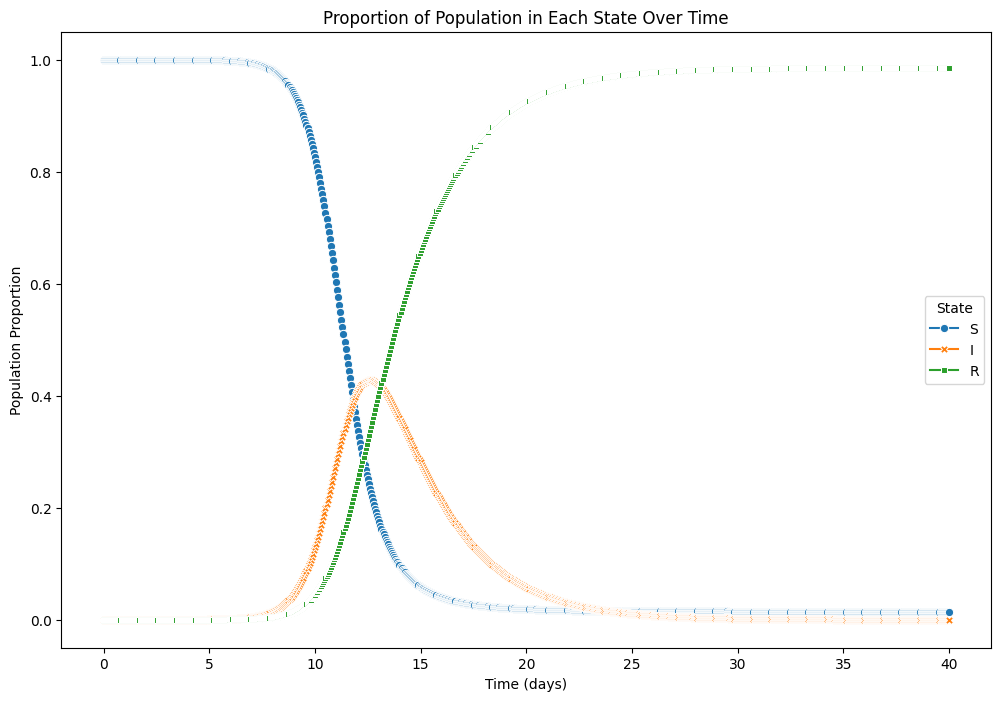

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path ="/content/drive/MyDrive/PhD Research Project/beta_1.56756_gamma_0.36508.csv"
all_data=pd.read_csv(path)
all_data.head(4)

# Reshaping data for plotting
all_data_long = all_data.melt(id_vars=['time'], var_name='state', value_name='proportion')

# Modify the levels of the state variable
state_order = ["S", "I", "R"]
all_data_long['state'] = pd.Categorical(all_data_long['state'], categories=state_order, ordered=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data_long, x='time', y='proportion', hue='state')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend(title='State', loc='lower right')
plt.title('Proportion of Population in Each State Over Time')
plt.show()

# Using small multiples
plt.figure(figsize=(12, 8))
sns.lineplot(data=all_data_long, x='time', y='proportion', hue='state', style='state', markers=True, dashes=False)
plt.xlabel('Time (days)')
plt.ylabel('Population Proportion')
plt.title('Proportion of Population in Each State Over Time')
plt.legend(title='State')
plt.subplots_adjust(hspace=0.5)
plt.show()


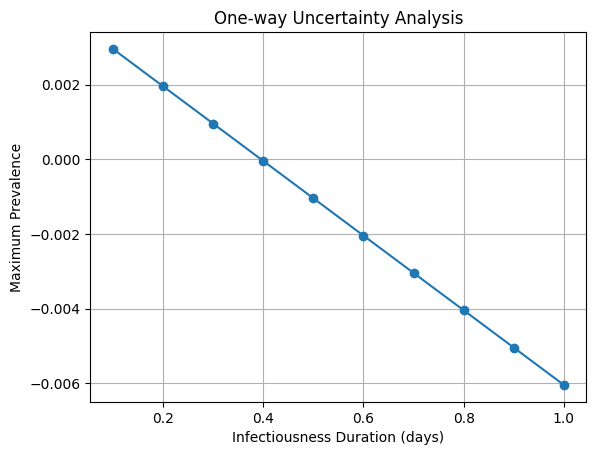

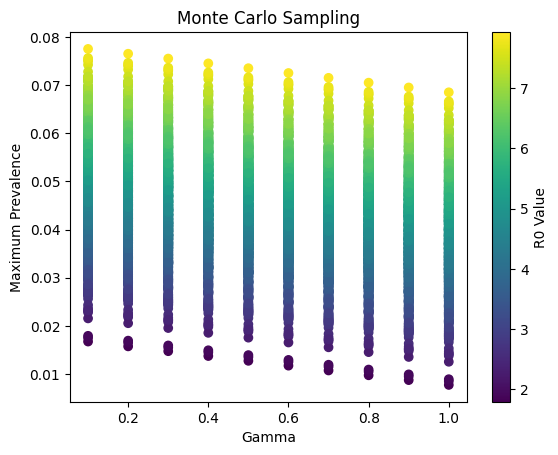

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE model function
def solveODE(parameters):
    beta, gamma = parameters
    def sir_model(t, y, params):
        S, I, R = y
        dS = -beta * S * I
        dI = beta * S * I - gamma * I
        dR = gamma * I
        return [dS, dI, dR]
    return sir_model

# Define the gamma values
gamma_vec = np.linspace(0.1, 1.0, 10)

# Define the beta value
beta = 0.4

# Initialize max prevalence container
max_prevalence = []

# Loop over each gamma value
for gamma_val in gamma_vec:
    parameters = [beta, gamma_val]
    sir_model = solveODE(parameters)
    max_prevalence.append(sir_model(0, [0.99, 0.01, 0], parameters)[1])

# Plot max prevalence as a function of the infectiousness duration
plt.plot(gamma_vec, max_prevalence, marker='o')
plt.xlabel('Infectiousness Duration (days)')
plt.ylabel('Maximum Prevalence')
plt.title('One-way Uncertainty Analysis')
plt.grid(True)
plt.show()

# Now suppose that we have a previous epidemiological study that suggested that R0 has a mean value of 5,
# but uncertainty within the range of -1, +1
# We're going to first use a direct Monte Carlo Sampling method

# Set the random seed
np.random.seed(2019)

# Draw R0 1,000 times from a normal distribution
r0_all = np.random.normal(5, 1, 1000)

# Initialize max prevalence dataframe
size_df = len(r0_all) * len(gamma_vec)
max_prevalence_df = pd.DataFrame({'r0.value': np.zeros(size_df),
                                  'gamma': np.zeros(size_df),
                                  'max.prev': np.zeros(size_df)})
index = 0

# Loop over each R0 value
for r0_val in r0_all:
    # Loop over each gamma value
    for gamma_val in gamma_vec:
        parameters = [r0_val, gamma_val]
        sir_model = solveODE(parameters)
        max_prev = sir_model(0, [0.99, 0.01, 0], parameters)[1]
        max_prevalence_df.loc[index, 'r0.value'] = r0_val
        max_prevalence_df.loc[index, 'gamma'] = gamma_val
        max_prevalence_df.loc[index, 'max.prev'] = max_prev
        index += 1

# Plot the output
plt.scatter(max_prevalence_df['gamma'], max_prevalence_df['max.prev'], c=max_prevalence_df['r0.value'], cmap='viridis')
plt.colorbar(label='R0 Value')
plt.xlabel('Gamma')
plt.ylabel('Maximum Prevalence')
plt.title('Monte Carlo Sampling')
plt.show()
